In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


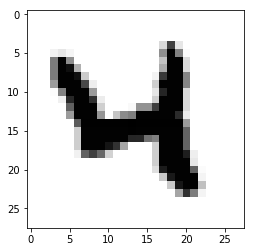

In [4]:
plt.imshow(train_images[20], cmap='binary')
plt.show()

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [6]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
                    batch_size=64, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 610us/step - loss: 0.1794 - acc: 0.9445 - val_loss: 0.0452 - val_acc: 0.9854
Epoch 2/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.0492 - acc: 0.9848 - val_loss: 0.0369 - val_acc: 0.9881
Epoch 3/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0306 - val_acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 37s 610us/step - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0315 - val_acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.0220 - acc: 0.9934 - val_loss: 0.0331 - val_acc: 0.9893
Epoch 6/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0313 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.0144 - acc: 0.9954 - val_loss: 0.